In [1]:
import numpy as np
import sklearn.metrics
import sklearn.datasets as ds
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import sklearn.multiclass
import sklearn.svm

w tym notebooku głównym rodzajem przedstawionych metryk będą te, które pozwalają na ewaluację zdolności modelu do dokonywania poprawnych przewidywań 

### regresja

dla regresji w większosći używane są takie same metryki jak dla funkcji straty z notebooka "Lab3-Funkcje_straty"

In [2]:
regression_ds = ds.make_regression(n_samples=2000, n_features=10, n_targets=1)

X_train, X_test, y_train, y_test = train_test_split(regression_ds[0], regression_ds[1])

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

# poniższe metryki są używane także jako funkcja straty
mean_absolute_error = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mean_squared_error = sklearn.metrics.mean_squared_error(y_test, y_pred)

print('mean_absolute_error:', mean_absolute_error)
print('mean_squared_error:', mean_squared_error)

# więcej przykładów we wspomnianym notebooku

mean_absolute_error: 9.241851728347683e-14
mean_squared_error: 1.3447555656843354e-26


poza tym, w sklearn dla regresji można znaleźć metryki:

In [3]:
print('explained_variance_score:', sklearn.metrics.explained_variance_score(y_test, y_pred))
print('r2_score:', sklearn.metrics.r2_score(y_test, y_pred))

explained_variance_score: 1.0
r2_score: 1.0


### klasyfikacja

In [4]:
multiclass_ds = ds.make_classification(n_samples=2000, n_features=10, n_classes=3, n_informative=3, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(multiclass_ds[0], multiclass_ds[1])
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score: 0.43
balanced_accuracy_score: 0.43550457439037116
top_k_accuracy_score: 0.75
recall_score: [0.44382022 0.27058824 0.59210526]
precision_score: [0.46470588 0.368      0.43902439]
specificity: [0.7, 0.6693333333333333, 0.7898305084745763]
f1_score: [0.45402299 0.31186441 0.50420168]
fbeta_score: [0.46037296 0.34328358 0.46296296]
matthews_corrcoef (MCC): 0.15059913034457373
cohen_kappa_score: 0.14838941014761253
jaccard_score: [0.2936803  0.18473896 0.33707865]


C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


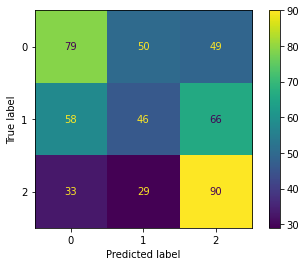

In [5]:
# metryki dokładności:
print('accuracy_score:', sklearn.metrics.accuracy_score(y_test, y_pred))
print('balanced_accuracy_score:', sklearn.metrics.balanced_accuracy_score(y_test, y_pred))

y_true = np.array([0, 1, 2, 2])
y_score = np.array([[0.5, 0.2, 0.2],
                    [0.3, 0.4, 0.2], 
                    [0.2, 0.4, 0.3], 
                    [0.7, 0.2, 0.1]])
print('top_k_accuracy_score:', sklearn.metrics.top_k_accuracy_score(y_true, y_score))

# metryki probabilistyczne, tak jak i metryki hinge, były już użyte w notebooku "Lab3-Funkcje_straty"

# metryki bazujące na pozytywach i negatywach
# (Ponieważ problem jest wieloklasowy, należy ustawić parametr "average", który domyślnie jest wybrany jako "binary".
# W przypadku ustawienia parametru na "None", zostają zwrócone wyniki dla każdej z klas)
print('recall_score:', sklearn.metrics.recall_score(y_test, y_pred, average=None))
print('precision_score:', sklearn.metrics.precision_score(y_test, y_pred, average=None))

# ..., które pochodzą z tablicy pomyłek
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2]
sklearn.metrics.plot_confusion_matrix(model, X_test, y_test)

# swoistości samej w sobie nie ma zaimplementowanej w sklearn, natomiast można ją obliczyć z tablicy pomyłek
def specificity(cm, labels):
    specificities = []
    for label_i, label in enumerate(labels):
        tn = 0
        for row_i, row in enumerate(cm):
            for col_i, counts in enumerate(row):
                if (col_i != label_i and row_i != label_i):
                    tn += counts
        fp = np.sum(np.delete(cm[label_i], label_i, 0))
        specificities.append(tn / (tn + fp))
    return specificities
        
print('specificity:', specificity(confusion_matrix, labels))

# inne metryki pochodzące z tablicy pomyłek
print('f1_score:', sklearn.metrics.f1_score(y_test, y_pred, average=None))
print('fbeta_score:', sklearn.metrics.fbeta_score(y_test, y_pred, beta=0.5, average=None))
print('matthews_corrcoef (MCC):', sklearn.metrics.matthews_corrcoef(y_test, y_pred))

# i jeszcze inne metryki
print('cohen_kappa_score:', sklearn.metrics.cohen_kappa_score(y_test, y_pred))
print('jaccard_score:', sklearn.metrics.jaccard_score(y_test, y_pred, average=None))

In [6]:
y_pred

array([2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2,

### rysowanie krzywej ROC

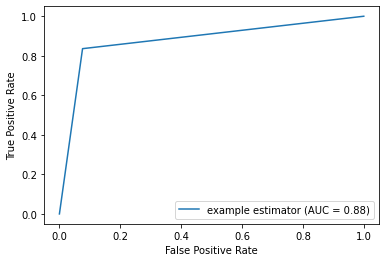

In [7]:
# dla dwóch klas
binaryclass_ds = ds.make_classification(n_samples=2000, n_features=10, n_classes=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(binaryclass_ds[0], binaryclass_ds[1])
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred)
roc_auc = sklearn.metrics.auc(fpr, tpr)
display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()